In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Transformed_Housing_Data = pd.read_csv('Transformed_Housing_Data.csv')

In [3]:
Transformed_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [4]:
Transformed_Housing_Data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [5]:
Transformed_Housing_Data.drop(columns='ID' , inplace=True) 

In [6]:
Transformed_Housing_Data['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [7]:
Transformed_Housing_Data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [8]:
Transformed_Housing_Data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

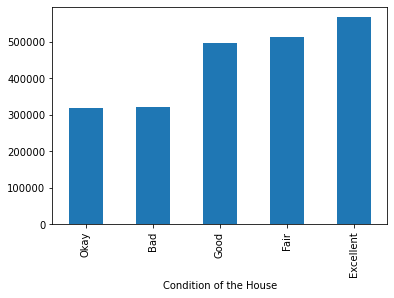

In [9]:
Transformed_Housing_Data.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Ever Renovated'>

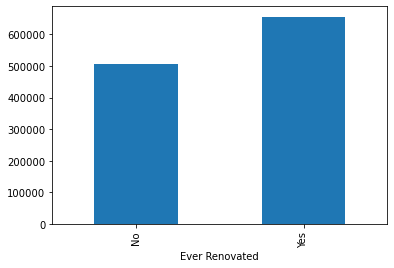

In [10]:
Transformed_Housing_Data.groupby('Ever Renovated',)['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Zipcode'>

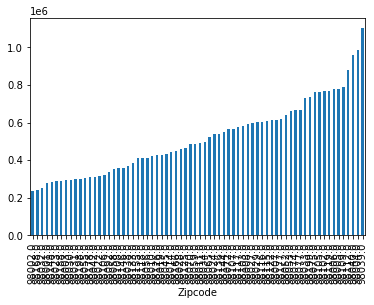

In [11]:
Transformed_Housing_Data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Waterfront View'>

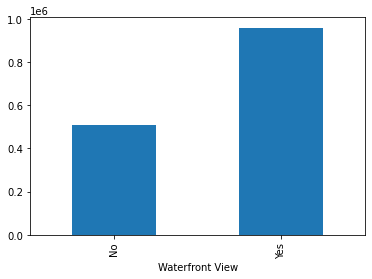

In [12]:
Transformed_Housing_Data.groupby('Waterfront View',)['Sale Price'].mean().sort_values().plot(kind='bar')

In [18]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [19]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns={'Sale Price' : 'Sale_Price' , 'Condition of the House' : 'Condition_of_the_House'})

In [20]:
Transformed_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront_View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition_of_the_House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [21]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns={'Ever Renovated' : 'Ever_Renovated' , 'Waterfront View' : 'Waterfront_View'})

In [22]:
Transformed_Housing_Data.head(5)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [23]:
mod = ols('Sale_Price ~ Condition_of_the_House' , data = Transformed_Housing_Data).fit()

In [28]:
    Anova_table = sm.stats.anova_lm(mod , type = 2)

In [29]:
print(Anova_table)

                             df        sum_sq       mean_sq         F  \
Condition_of_the_House      4.0  1.441831e+13  3.604579e+12  58.25563   
Residual                21604.0  1.336752e+15  6.187520e+10       NaN   

                              PR(>F)  
Condition_of_the_House  5.447605e-49  
Residual                         NaN  


In [30]:
mod = ols('Sale_Price ~ Waterfront_View' , data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod , type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
Waterfront_View,1.0,3.283737e+13,3.283737e+13,538.192683,1.275558e-117
Residual,21607.0,1.318333e+15,6.101415e+10,NaN,NaN


In [31]:
mod = ols('Sale_Price ~ Ever_Renovated' , data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod , type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
Ever_Renovated,1.0,1.998463e+13,1.998463e+13,324.378469,5.419055e-72
Residual,21607.0,1.331185e+15,6.160899e+10,NaN,NaN


In [32]:
mod = ols('Sale_Price ~ Zipcode' , data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod , type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
Zipcode,1.0,2.503765e+12,2.503765e+12,40.112844,2.444308e-10
Residual,21607.0,1.348666e+15,6.241803e+10,NaN,NaN


In [33]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data , columns= ['Ever_Renovated' , 'Waterfront_View' , 'Condition_of_the_House'] , drop_first= True)

In [34]:
Transformed_Housing_Data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Ever_Renovated_Yes,Waterfront_View_Yes,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,1,0,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,0,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,-122.346,1530.0,1509,0,0,0,0,1,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,-122.362,1830.0,7200,0,0,0,0,1,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,-122.299,1020.0,2007,0,0,0,0,1,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,-122.069,1410.0,1287,0,0,0,0,1,0,0


In [35]:
Zip_Table = Transformed_Housing_Data.groupby('Zipcode').agg({'Sale_Price' : 'mean'}).sort_values('Sale_Price' , ascending=True)
Zip_Table

,Sale_Price
Zipcode,
98002.0,2.342840e+05
98168.0,2.403284e+05
98032.0,2.512962e+05
98001.0,2.808047e+05
98148.0,2.849086e+05
...,...
98109.0,7.876028e+05
98112.0,8.807990e+05
98040.0,9.621087e+05


In [36]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'] ,bins = 10,
                                   labels= ['Zipcode_Group_0'
                                           'Zipcode_Group_1',
                                           'Zipcode_Group_2',
                                           'Zipcode_Group_3',
                                           'Zipcode_Group_4',
                                           'Zipcode_Group_5',
                                           'Zipcode_Group_6',
                                           'Zipcode_Group_7',
                                           'Zipcode_Group_8',
                                           'Zipcode_Group_9',] , include_lowest=True)

ValueError: Bin labels must be one fewer than the number of bin edges